<a href="https://colab.research.google.com/github/WilliamPoe/CSCI-290/blob/main/notebooks/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/WilliamPoe/CSCI-290/raw/main/Data/ad_click_dataset.csv")

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [5]:
train_set.columns

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')

In [6]:
train_set = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [7]:
test_set = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day', 'click']]

In [8]:
X_train = train_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_train = train_set['click']

In [9]:
X_test = test_set[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
y_test = test_set['click']

Work on the stuff below

In [10]:
num_attributes = X_train.select_dtypes( include = ['float64']).columns
cat_attributes = X_train.select_dtypes( include = ['object']).columns

In [11]:
trf = [ ('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),
         ('Scaler', StandardScaler())]),
         num_attributes), ('cat', OneHotEncoder( handle_unknown='ignore' ), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [12]:
oldpipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=5))])

In [13]:
cross_val_score( oldpipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.66375 , 0.664375, 0.65625 , 0.66    , 0.665625])

In [14]:
oldmodel = oldpipeline.fit( X_train, y_train )
oldmodel

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=5))])

In [15]:
oldpredictions = oldpipeline.predict( X_test )

In [16]:
oldcm = confusion_matrix(y_test, oldpredictions)

In [17]:
oldcm

array([[  83,  625],
       [  44, 1248]])

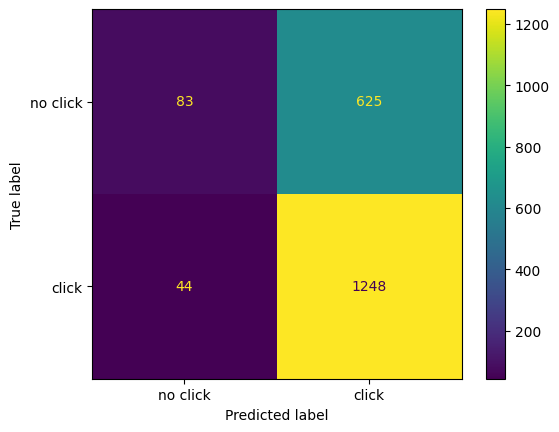

In [18]:
ConfusionMatrixDisplay(oldcm, display_labels=["no click", "click"]).plot()

In [19]:
oldRecall = metrics.recall_score(y_test, oldpredictions)

In [20]:
oldPrecision = metrics.precision_score(y_test, oldpredictions)

In [21]:
oldF1 = metrics.f1_score(y_test, oldpredictions)

In [22]:
oldAccuracy = metrics.accuracy_score(y_test, oldpredictions)

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
params = {
    'clf__max_leaf_nodes': list(range(2, 10)),
    'clf__max_depth': list(range(1, 7)),
    'clf__min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(oldpipeline,
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('pre',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('Scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age'], dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                                       ('clf',
                                        DecisionTreeClassifier(max_depth=5))]),
             param_grid={'clf__max_depth': [1, 2, 3, 4, 5, 6],
                         'clf__max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9],
                         'clf__min_samples_split': [2, 3, 4]})

In [25]:
grid_search_cv.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8))])

In [26]:
grid_search_cv.best_params_

{'clf__max_depth': 6, 'clf__max_leaf_nodes': 8, 'clf__min_samples_split': 2}

In [27]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8, min_samples_split=2))])

In [28]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.655625, 0.66    , 0.656875, 0.6575  , 0.660625])

In [29]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['age'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'],
      dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=4, max_leaf_nodes=8))])

In [30]:
predictions = grid_search_cv.predict(X_test)

In [31]:
cm = confusion_matrix(y_test, predictions)
cm

array([[  17,  691],
       [   7, 1285]])

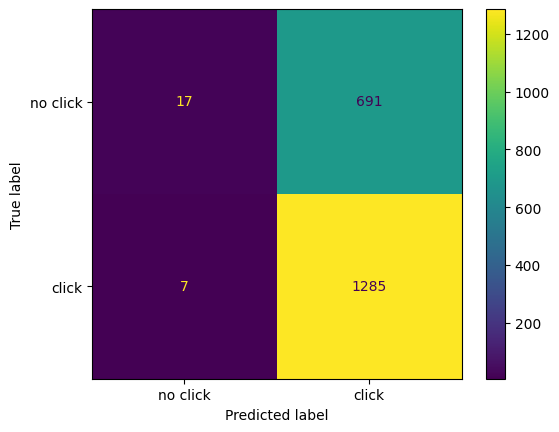

In [32]:
ConfusionMatrixDisplay(cm, display_labels=["no click", "click"]).plot()

[Text(0.5, 0.9, 'x[0] <= 0.669\ngini = 0.454\nsamples = 8000\nvalue = [2792, 5208]'),
 Text(0.2, 0.7, 'x[0] <= -2.291\ngini = 0.443\nsamples = 6602\nvalue = [2187, 4415]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.263\nsamples = 45\nvalue = [38, 7]'),
 Text(0.3, 0.5, 'x[15] <= 0.5\ngini = 0.441\nsamples = 6557\nvalue = [2149, 4408]'),
 Text(0.2, 0.3, 'x[9] <= 0.5\ngini = 0.434\nsamples = 5911\nvalue = [1879.0, 4032.0]'),
 Text(0.1, 0.1, 'gini = 0.443\nsamples = 4239\nvalue = [1405, 2834]'),
 Text(0.3, 0.1, 'gini = 0.406\nsamples = 1672\nvalue = [474, 1198]'),
 Text(0.4, 0.3, 'gini = 0.487\nsamples = 646\nvalue = [270.0, 376.0]'),
 Text(0.8, 0.7, 'x[0] <= 2.466\ngini = 0.491\nsamples = 1398\nvalue = [605, 793]'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'x[0] <= 1.197\ngini = 0.487\nsamples = 1358\nvalue = [571.0, 787.0]'),
 Text(0.6, 0.3, 'x[14] <= 0.5\ngini = 0.498\nsamples = 309\nvalue = [164, 145]'),
 Text(0.5, 0.1, 'gini = 0.5\nsamples = 283\nvalue = [141, 142]'),


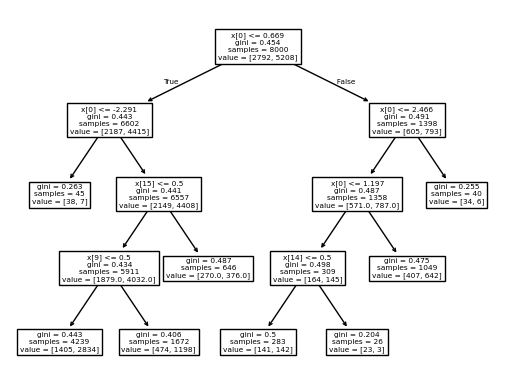

In [33]:
plot_tree( pipeline.named_steps['clf'])

In [34]:
recall = metrics.recall_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions)
f1 = metrics.f1_score(y_test, predictions)
accuracy = metrics.accuracy_score(y_test, predictions)

In [35]:
print("Recall: ", recall)
print("Precision: ", precision)
print("F1: ", f1)
print("Accuracy: ", accuracy)

Recall:  0.9945820433436533
Precision:  0.6503036437246964
F1:  0.7864137086903304
Accuracy:  0.651


In [36]:
print("Old Recall: ", oldRecall)
print("Old Precision: ", oldPrecision)
print("Old F1: ", oldF1)
print("Old Accuracy: ", oldAccuracy)

Old Recall:  0.9659442724458205
Old Precision:  0.6663107314468767
Old F1:  0.7886255924170616
Old Accuracy:  0.6655
